# Домашнее задание к занятию "Поиск выбросов и генерация новых признаков"

## Задание

Цель: Изучить применение методов по поиску выбросов в данных, попрактиковаться в обработке экстремальных значений.
Описание задания:
В домашнем задании нужно решить задачу классификации типа стекол. Данные для обучения моделей (glass.csv) можно скачать с [сайта](https://www.kaggle.com/datasets/uciml/glass). Целевая переменная – тип стекла «Type». Остальные признаки описывают химические элементы в составе материала. Датасет нужно исследовать на наличие выбросов, провести EDA.

Этапы работы:

1. Получите данные и загрузите их в рабочую среду (Jupyter Notebook или другую).
2. Проведите первичный анализ.
    - Проверьте количество записей для каждого класса. Сделайте вывод.
3. Разделите выборку на обучающее и тестовое подмножество. 80% данных оставить на обучающее множество, 20% на тестовое.
4. Обучите модель дерева решений RandomForestClassifier на обучающем множестве.
5. Для тестового множества предскажите тип стекла и сравните с истинным значением, посчитав точность предсказания модели (accuracy).
6. Обработайте выбросы в данных.
    - Визуализируйте распределение значений для каждой переменной. Можно использовать функции sns.boxplot, sns.distplot. Есть ли признаки с нормальным распределением?
    - Исследуйте признаки на выбросы несколькими способами.
    - Удалите выбросы. *Посчитайте процент удаленных записей от общего числа записей для каждого класса.
7. Повторите п. 4, п. 5.
8. Сформулируйте выводы по проделанной работе.
    - Кратко опишите, какие преобразования были сделаны с данными.
    - Сравните точность двух моделей.
    - Напишите свое мнение, нужно ли исследовать данные на выбросы, для чего это делается, плюсы и минусы подхода.

Для получения зачета по этому домашнему заданию минимально должны быть реализованы методы по поиску выбросов и построены две модели: «до» и «после» обработки экстремальных значений.
Результат:
Получены практические знания по работе с выбросами в данных.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest
from sklearn.cluster import DBSCAN

## 1. Загрузка данных в датафрейм

In [2]:
df = pd.read_csv('glass.csv')
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


## 2. Первичный анализ данных

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


В датафрейме нет пропусков значений. Все типы данных определены правильно.

In [4]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [5]:
glass_type = df.groupby('Type').agg({'Type': 'count'})
glass_type

,Type
Type,
1,70
2,76
3,17
5,13
6,9
7,29


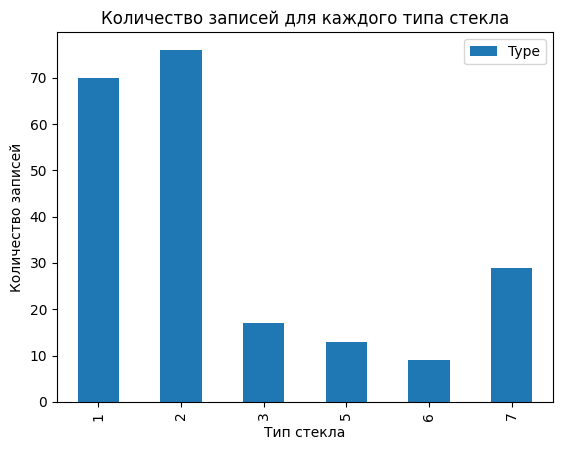

In [6]:
glass_type.plot(kind='bar')
plt.title('Количество записей для каждого типа стекла')
plt.xlabel('Тип стекла')
plt.ylabel('Количество записей')
plt.show()

**Вывод**: Мы имеем дело со смещенной выборкой. Количество записей значительно отличается для разным типов стекла.

## 3. Разделим выборку на обучающее и тестовое подмножества

In [7]:
X_train, X_test, y_train, y_test = train_test_split(df[df.columns[:-1]],
                                                    df[df.columns[-1]],
                                                    test_size=0.2,
                                                    random_state=10)

In [8]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((171, 9), (171,), (43, 9), (43,))

## 4. Обучаем модель дерева решений RandomForestClassifier на обучающем множестве

In [9]:
clf_tree = DecisionTreeClassifier(random_state=10, max_depth=5)
clf_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=10)

In [10]:
clf_tree.get_depth()

5

In [11]:
clf_tree.get_n_leaves()

18

## 5. Предсказываем тип стекла и сравниваем с истинным значением, считаем метрику accuracy

In [12]:
train_predict = clf_tree.predict(X_train)
test_predict = clf_tree.predict(X_test)

In [13]:
accuracy_train = classification_report(y_train, train_predict, output_dict=True)['accuracy']
accuracy_train

0.8654970760233918

In [14]:
accuracy_test = classification_report(y_test, test_predict, output_dict=True)['accuracy']
accuracy_test

0.627906976744186

## 6. Обработка выбросов

### 6.1 Визуализация распределения признаков

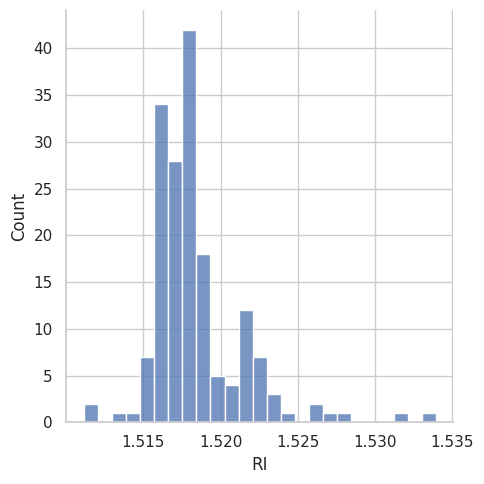

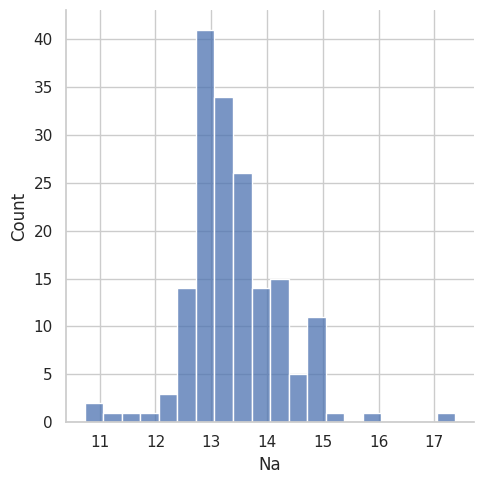

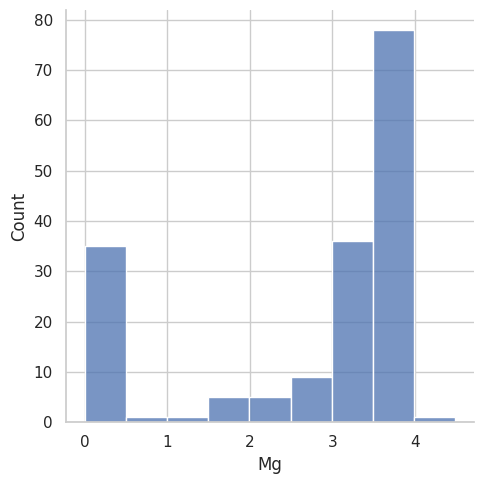

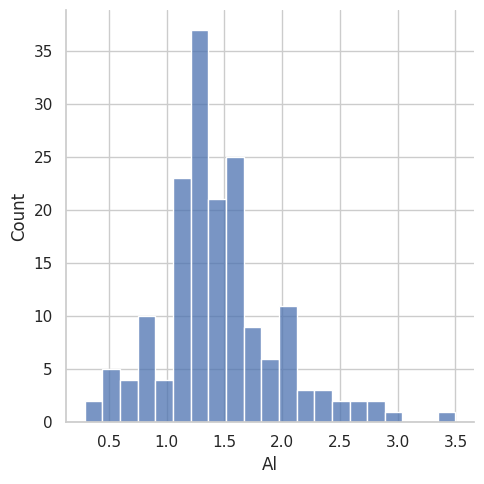

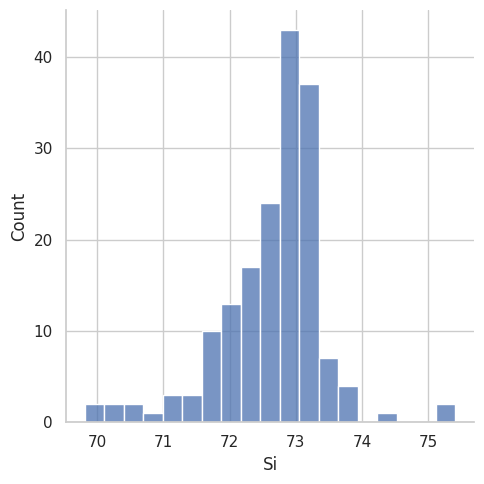

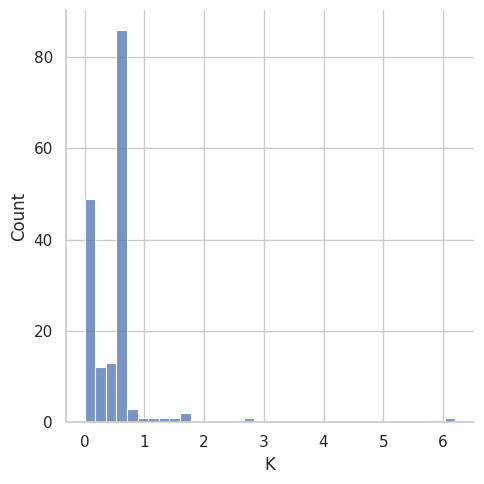

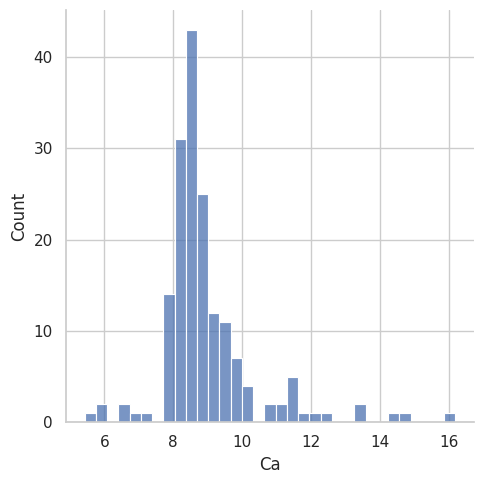

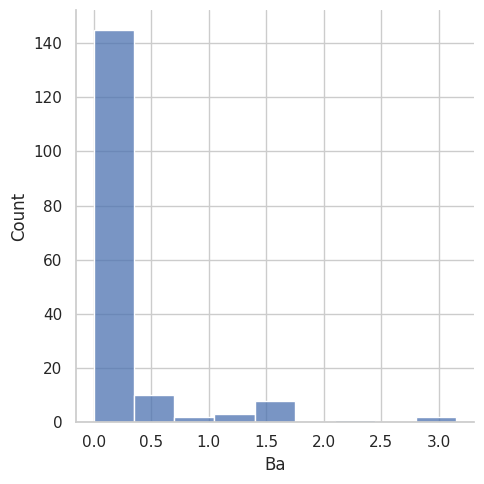

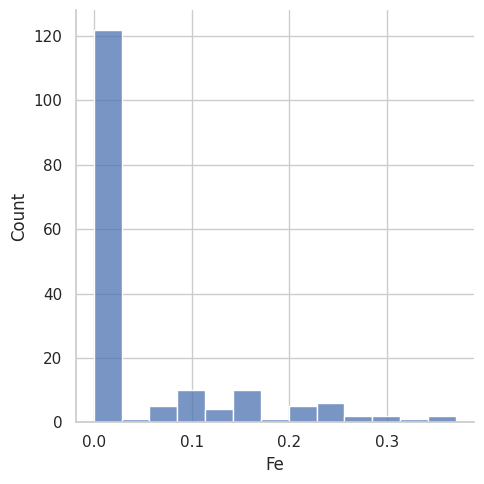

In [15]:
sns.set(rc={'figure.figsize': (10, 6)})
sns.set_theme(style="whitegrid")
for i in X_train.columns:
    sns.displot(data=X_train, x=i)
    plt.xlabel(i)
    plt.show()

**Вывод**:
- визкально распределение признаков Rl, Na, Al, Si напоминает нормальное,
- однако значения практически всех признаков содержат выбросы

### 6.2 Исследование признаков на выбросы

#### OCSVM

In [16]:
ocsvm_model = OneClassSVM(nu=0.1)
ocsvm_model.fit(X_train)

OneClassSVM(nu=0.1)

In [17]:
ocsvm = ocsvm_model.predict(X_train)
ocsvm

array([ 1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,
        1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1])

Вычислим % выбросов, полученных при помощи модели OneClassSVM

In [18]:
np.sum(ocsvm == -1) / ocsvm.shape[0] * 100

9.941520467836257

#### IsolationForest

In [19]:
iforest_model = IsolationForest()
iforest_model.fit(X_train)

IsolationForest()

In [20]:
iforest = iforest_model.predict(X_train)
iforest

array([ 1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1, -1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1])

Вычислим % выбросов, полученных при помощи модели IsolationForest

In [21]:
np.sum(iforest == -1) / iforest.shape[0] * 100

10.526315789473683

#### DBSCAN

In [22]:
X_train_stand = StandardScaler().fit_transform(X_train)

In [23]:
dbscan_model = DBSCAN(eps=2.0)
dbscan_model.fit(X_train_stand)

DBSCAN(eps=2.0)

In [24]:
dbscan = dbscan_model.labels_
dbscan

array([ 0,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0,  1,  0, -1,  0,  0,  0,
        1,  0,  0,  0, -1,  0,  0,  1, -1,  1,  0,  0,  0, -1,  0,  0,  1,
        0,  0,  0, -1,  0, -1,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  1,  0,  0,  0,  0,  0,
        0,  1,  0,  0,  0, -1,  1,  0,  1,  0, -1,  0,  0,  0,  1, -1, -1,
        0,  0,  0,  1,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  1,  0,  0,  0,  1,  0,  0,
       -1,  1,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  1,  0,  0,  0, -1,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,
        0])

Вычислим % выбросов, полученных при помощи модели DBSCAN

In [25]:
np.sum(dbscan == -1) / dbscan.shape[0] * 100

10.526315789473683

### 6.3 Удаление выбросов

#### Добавим результаты в обучающий датафрейм в качестве признака:

In [26]:
X_train[['ocsvm', 'iforest', 'dbscan']] = np.c_[ocsvm, iforest, dbscan]

In [27]:
y_train = np.c_[y_train, ocsvm, iforest, dbscan]

#### Удалим выбросы, полученные при помощи модели OneClassSVM

In [28]:
X_train_ocsvm = X_train[X_train.ocsvm != -1]

In [29]:
X_train_ocsvm.shape

(154, 12)

In [30]:
y_train_ocsvm = y_train[y_train[:, 1] != -1]

In [31]:
y_train_ocsvm.shape

(154, 4)

#### Удалим выбросы, полученные при помощи модели IsolationForest

In [32]:
X_train_iforest = X_train[X_train.iforest != -1]

In [33]:
X_train_iforest.shape

(153, 12)

In [34]:
y_train_iforest = y_train[y_train[:, 2] != -1]

In [35]:
y_train_iforest.shape

(153, 4)

#### Удалим выбросы, полученные при помощи модели DBSCAN

In [36]:
X_train_dbscan = X_train[X_train.dbscan != -1]

In [37]:
X_train_dbscan.shape

(153, 12)

In [38]:
y_train_dbscan = y_train[y_train[:, 3] != -1]

In [39]:
y_train_dbscan.shape

(153, 4)

#### Расчитаем % удаленных записей по каждому типу стекла

In [40]:
y_train = pd.DataFrame(y_train[:, 0], columns=['Type'])

In [41]:
y_train_ocsvm = pd.DataFrame(y_train_ocsvm[:, 0], columns=['Type'])

In [43]:
y_train_iforest = pd.DataFrame(y_train_iforest[:, 0], columns=['Type'])

In [44]:
y_train_dbscan = pd.DataFrame(y_train_dbscan[:, 0], columns=['Type'])

In [50]:
grouped = pd.concat([y_train.groupby('Type').agg(before=('Type', 'count')),
                     y_train_ocsvm.groupby('Type').agg(ocsvm=('Type', 'count')),
                     y_train_iforest.groupby('Type').agg(iforest=('Type', 'count')),
                     y_train_dbscan.groupby('Type').agg(dbscan=('Type', 'count'))],
                     axis=1)

In [53]:
percent_columns = ['ocsvm_%', 'iforest_%', 'dbscan_%']
columns = ['ocsvm', 'iforest', 'dbscan']

In [54]:
for i in range(3):
    grouped[percent_columns[i]] = round((grouped['before'] - grouped[columns[i]]) /
                                        grouped['before'] * 100, 2)

In [55]:
grouped

,before,ocsvm,iforest,dbscan,ocsvm_%,iforest_%,dbscan_%
Type,,,,,,,
1,53,51,53,53,3.77,0.00,0.00
2,63,56,56,57,11.11,11.11,9.52
3,13,13,12,13,0.00,7.69,0.00
5,10,7,8,5,30.00,20.00,50.00
6,7,6,6,6,14.29,14.29,14.29
7,25,21,18,19,16.00,28.00,24.00


## 7. Обучение модели RandomForestClassifier после удаления выбросов

### 7.1 OCSVM

In [57]:
clf_tree_ocsvm = DecisionTreeClassifier(random_state=10, max_depth=5)
clf_tree_ocsvm.fit(X_train_ocsvm[X_train_ocsvm.columns[:9]], y_train_ocsvm)

DecisionTreeClassifier(max_depth=5, random_state=10)

In [58]:
train_predict_ocsvm = clf_tree_ocsvm.predict(X_train_ocsvm[X_train_ocsvm.columns[:9]])
test_predict_ocsvm = clf_tree_ocsvm.predict(X_test)

In [59]:
accuracy_train_ocsvm = classification_report(y_train_ocsvm,
                                             train_predict_ocsvm,
                                             output_dict=True)['accuracy']
accuracy_train_ocsvm

0.8636363636363636

In [66]:
accuracy_test_ocsvm = classification_report(y_test,
                                            test_predict_ocsvm,
                                            output_dict=True)['accuracy']
accuracy_test_ocsvm

0.627906976744186

### 7.2 IsolationForest

In [62]:
clf_tree_iforest = DecisionTreeClassifier(random_state=10, max_depth=5)
clf_tree_iforest.fit(X_train_iforest[X_train_iforest.columns[:9]], y_train_iforest)

DecisionTreeClassifier(max_depth=5, random_state=10)

In [64]:
train_predict_iforest = clf_tree_iforest.predict(X_train_iforest[X_train_iforest.columns[:9]])
test_predict_iforest = clf_tree_iforest.predict(X_test)

In [65]:
accuracy_train_iforest = classification_report(y_train_iforest,
                                             train_predict_iforest,
                                             output_dict=True)['accuracy']
accuracy_train_iforest

0.8823529411764706

In [67]:
accuracy_test_iforest = classification_report(y_test,
                                             test_predict_iforest,
                                             output_dict=True)['accuracy']
accuracy_test_iforest

0.627906976744186

### 7.3 DBSCAN

In [68]:
clf_tree_dbscan = DecisionTreeClassifier(random_state=10, max_depth=5)
clf_tree_dbscan.fit(X_train_dbscan[X_train_dbscan.columns[:9]], y_train_dbscan)

DecisionTreeClassifier(max_depth=5, random_state=10)

In [69]:
train_predict_dbscan = clf_tree_dbscan.predict(X_train_dbscan[X_train_dbscan.columns[:9]])
test_predict_dbscan = clf_tree_dbscan.predict(X_test)

In [70]:
accuracy_train_dbscan = classification_report(y_train_dbscan,
                                             train_predict_dbscan,
                                             output_dict=True)['accuracy']
accuracy_train_dbscan

0.869281045751634

In [71]:
accuracy_test_dbscan = classification_report(y_test,
                                             test_predict_dbscan,
                                             output_dict=True)['accuracy']
accuracy_test_dbscan

0.5813953488372093

## 8. Выводы

### 8.1 Какие преобразования были выполнены?
- Данные были разделены на обучающую и тестовую выборку.
- Проведено обучение модели DecisionTreeClassifier
- Из обучающей выборки были удалены выбросы, выявленные при следующих помощи моделей: OneClassSVM, IsolationForest, DBSCAN)
- Провено повторное обучение модели DecisionTreeClassifier

### 8.2 Сравнение точности моделей

In [72]:
result_dict = {
    'before': [accuracy_train, accuracy_test],
    'ocsvm': [accuracy_train_ocsvm, accuracy_test_ocsvm],
    'itree': [accuracy_train_iforest, accuracy_test_iforest],
    'dbscan': [accuracy_train_dbscan, accuracy_test_dbscan],
}

In [74]:
pd.DataFrame(result_dict, index=['train', 'test'])

,before,ocsvm,itree,dbscan
train,0.865497,0.863636,0.882353,0.869281
test,0.627907,0.627907,0.627907,0.581395


- лучшие значения метрики не обучащюей выборке показала модель после уделиния выбросов, рекомендованных моделью IsolationForest;
- на тестовой выборке улучшения значения метрики получено не было

### 8.3 Для чего надо исследовать данные на выбросы?

- Исследование данных на выбросы проводится с целью выявления значений, выходящих за рамки здрвого смысла. Которые могли появиться в результате ошибок, возникающих при внесении данных или некоректной работы оборудования.
- В свою очередь необходимо учитывать и тот факт, что за выбросы могут быть приняты не опроеделенные ране кластеры, удаление которых может негативно повлиять на результаты анализа вцелом.
- Использование моделей машинного обучения позволяет быстрее выполнять этот этап, особенно при наличии большого количества признаков.
- Однако автоматизация процесса нахождения выбросов может приветси к потере важных данных.